In [72]:
import os
import json

# Load annotations
annotations = []
base_dir = "E:/Om/Other Projects/ClearQuote_Assignment/data"  # Replace with your actual path
for root, _, files in os.walk(base_dir):
    for file in files:
        if file == "via_region_data.json":
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
                for key, annotation in data.items():  # Assuming VIA annotations are stored in a dictionary
                    # Add the "path" column to each annotation
                    annotation["path"] = os.path.relpath(root, base_dir)
                annotations.extend(data.values())  # Assuming VIA annotations are stored in a dictionary

In [3]:
import os

base_dir = "E:/Om/Other Projects/ClearQuote_Assignment/data"
# Get all image files with common extensions from the directory (case-insensitive)
image_files = set()
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', ".JPG")):
            image_files.add(file)

In [4]:
# QUICK CHECK
annotation_files = set(ann['filename'] for ann in annotations)
# Identify missing files
missing_files = image_files - annotation_files  

# Output results
print(f"Total annotated files: {len(annotation_files)}")
print(f"Total actual image files: {len(image_files)}")
print(f"Missing images count: {len(missing_files)}")

Total annotated files: 3974
Total actual image files: 3977
Missing images count: 3


In [5]:
"E:\Om\Other Projects\ClearQuote_Assignment\data\623c0fbeb098d00d5a410cca\scraped_Cz4jMp_1648036661181.jpg"
"E:\Om\Other Projects\ClearQuote_Assignment\data\623c0fbeb098d00d5a410cca\scraped_Rx1eYe_1648033707539.jpg"
"E:\Om\Other Projects\ClearQuote_Assignment\data\623c0fbeb098d00d5a410cca\scraped_mfy5ef_1648036425126.jpg"

'E:\\Om\\Other Projects\\ClearQuote_Assignment\\dataƓc0fbeb098d00d5a410cca\\scraped_mfy5ef_1648036425126.jpg'

In [52]:
from PIL import Image
import os

base_dir = "E:/Om/Other Projects/ClearQuote_Assignment/data"
resolutions = []

for root, _, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png',  ".JPG")):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    resolutions.append((file, img.size))  # (filename, (width, height))
            except Exception as e:
                print(f"Error reading {file}: {e}")

print(f"Total images analyzed: {len(resolutions)}")


Total images analyzed: 3977


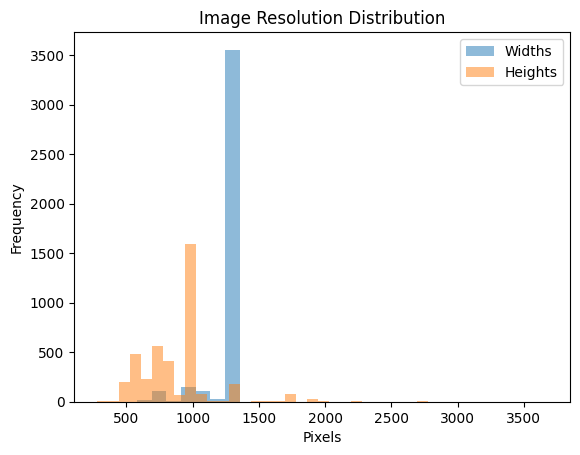

In [53]:
import matplotlib.pyplot as plt

widths, heights = zip(*[res for _, res in resolutions])
plt.hist(widths, bins=30, alpha=0.5, label='Widths')
plt.hist(heights, bins=30, alpha=0.5, label='Heights')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.title('Image Resolution Distribution')
plt.show()


In [54]:
corrupted_files = []

for root, _, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img.verify()
            except Exception as e:
                corrupted_files.append(image_path)

print(f"Corrupted files: {len(corrupted_files)}")


Corrupted files: 0


#### Check Blurred Image

In [55]:
import cv2

def is_blurry(image_path, threshold=100):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return True
    variance = cv2.Laplacian(image, cv2.CV_64F).var()
    return variance < threshold

blurry_images = []
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file)
            if is_blurry(image_path):
                blurry_images.append(image_path)

print(f"Blurry images: {len(blurry_images)}")


Blurry images: 309


In [56]:
import cv2
import os
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
%matplotlib inline

def get_blur_variance(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return image_path, None  # Handle unreadable files
    variance = cv2.Laplacian(image, cv2.CV_64F).var()
    return image_path, variance

def process_images(base_dir):
    image_paths = []
    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(root, file))
    return image_paths

base_dir = "E:/Om/Other Projects/ClearQuote_Assignment/data"
image_paths = process_images(base_dir)

# Use ThreadPoolExecutor for parallel processing
blur_data = []
with ThreadPoolExecutor() as executor:
    results = list(executor.map(get_blur_variance, image_paths))

# Filter out None values and sort by variance
blur_data = [(path, variance) for path, variance in results if variance is not None]

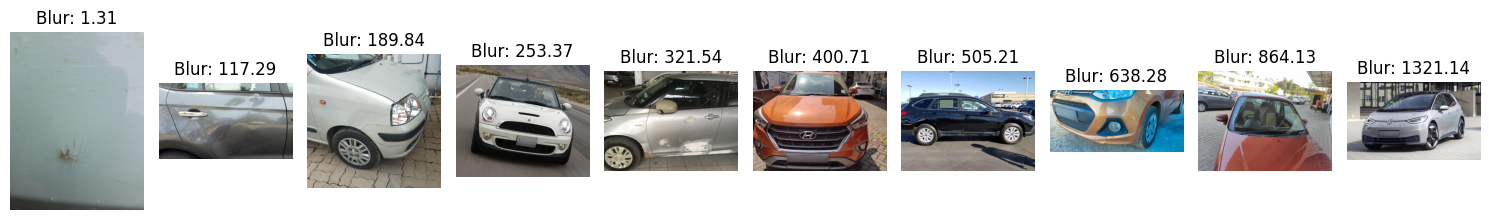

In [57]:
import numpy as np

# Sort blur_data in ascending order (most blurry to least blurry)
blur_data.sort(key=lambda x: x[1])

# Select `num_images_to_plot` images at equal intervals
num_images_to_plot = 10  # Adjust the number of images to display
interval = len(blur_data) // num_images_to_plot
sampled_blur_data = [blur_data[i * interval] for i in range(num_images_to_plot)]

# Plot the sampled images
plt.figure(figsize=(15, 10))
for i, (image_path, variance) in enumerate(sampled_blur_data):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Could not load image: {image_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(1, num_images_to_plot, i + 1)
    ax.imshow(img)
    ax.set_title(f"Blur: {variance:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


#### All the Classes

In [63]:
# Collect all unique annotations
unique_annotations = set()

for annotation in annotations:
    regions = annotation.get('regions', [])
    for region in regions:
        class_label = region['region_attributes'].get('identity', None)
        if class_label:
            unique_annotations.add(class_label)

# Display all unique annotations
print("Unique Annotations:")
print(list(sorted(unique_annotations)))


Unique Annotations:
['N', 'Paneldesign', 'Reflector', 'Roof', 'alloy bent', 'alloy curbrash', 'alloywheel', 'antenna', 'bonnet', 'broken', 'bumperbroken', 'bumperdent', 'bumpertear', 'bumpertorn', 'car', 'chipped', 'clipsbroken', 'cracked', 'd1', 'd2', 'd3', 'dirt', 'doorglass', 'doorhandle', 'doorhandlebroken', 'doorhandlemissing', 'fade', 'fadelamp', 'falsealloywheel', 'footstep', 'frontbumper', 'frontbumpercladding', 'frontbumpercladdingdetached', 'frontbumpergrille', 'frontbumpergrillebroken', 'frontbumpergrillemissing', 'frontbumpermissing', 'frontws', 'fuelcap', 'fuelcapmissing', 'headlightwasher', 'headlightwashermissing', 'indicator', 'indicatormissing', 'lampdislodged', 'leftapillar', 'leftbootlamp', 'leftbootlampmissing', 'leftbpillar', 'leftcabcorner', 'leftcpillar', 'leftdpillar', 'leftfender', 'leftfendermissing', 'leftfoglamp', 'leftfoglampassemblybroken', 'leftfoglampassemblymissing', 'leftfoglampmissing', 'leftfrontbumper', 'leftfrontdoor', 'leftfrontdoorcladding', 'lef

# Building Data Classes

In [59]:
annotation_to_class = {
    "Front": [
        "bonnet", "frontbumper", "frontws", "headlightwasher", "indicator",
        "leftheadlamp", "rightheadlamp", "frontbumpergrille", "lowerbumpergrille",
        "licenseplate", "namebadge"
    ],
    "Rear": [
        "rearbumper", "rearws", "fuelcap", "taillamp", "rearbumpercladding",
        "leftbootlamp", "rightbootlamp", "towbarcover", "lefttailgate",
        "righttailgate", "rearbumpermissing", "rearwsmissing"
    ],
    "Front-Right": [
        "rightfender", "rightfrontdoor", "rightfrontdoorglass", "rightorvm",
        "rightfoglamp", "partial_rightfender", "partial_rightfrontdoor",
        "rightfrontbumper"
    ],
    "Front-Left": [
        "leftfender", "leftfrontdoor", "leftfrontdoorglass", "leftorvm",
        "leftfoglamp", "partial_leftfender", "partial_leftfrontdoor",
        "leftfrontbumper"
    ],
    "Rear-Right": [
        "rightqpanel", "rightreardoor", "rightreardoorglass", "rightrearventglass",
        "partial_rightqpanel", "partial_rightreardoor", "rightrearbumper"
    ],
    "Rear-Left": [
        "leftqpanel", "leftreardoor", "leftreardoorglass", "leftrearventglass",
        "partial_leftqpanel", "partial_leftreardoor", "leftrearbumper"
    ],
    "None": [
        "alloywheel", "antenna", "car", "cracked", "dirt", "logo", "reflection",
        "rust", "scratch", "shattered", "sensor", "sunroof", "wiper", "series"
    ]
}


In [74]:
import pandas as pd
from shapely.geometry import Polygon

# Helper function to calculate area
def calculate_area(region_shape):
    if region_shape['name'] == 'polygon':
        points = list(zip(region_shape['all_points_x'], region_shape['all_points_y']))
        polygon = Polygon(points)
        return polygon.area
    return 0  # Handle other shapes if needed

# Process annotations into a DataFrame
processed_data = []

for annotation in annotations:
    image_name = annotation['filename']
    regions = annotation.get('regions', [])
    image_annotations = []
    annotation_areas = []
    class_labels = []
    class_areas = []

    for region in regions:
        region_attributes = region['region_attributes']
        shape_attributes = region['shape_attributes']

        # Get annotation name
        annotation_name = region_attributes.get('identity', 'None')
        image_annotations.append(annotation_name)

        # Calculate area
        area = calculate_area(shape_attributes)
        annotation_areas.append(area)

        # Map to class label
        class_label = annotation_to_class.get(annotation_name, 'None')
        class_labels.append(class_label)
        class_areas.append(area)

    processed_data.append({
        "path":annotation["path"],
        "image": image_name,
        "annotations": image_annotations,
        "ann_areas": annotation_areas,
        "class_labels": class_labels,
        "class_areas": class_areas
    })

# Create DataFrame
df = pd.DataFrame(processed_data)

# Display or save the DataFrame
df.head()


SyntaxError: invalid syntax (1134094795.py, line 42)

In [61]:
import pandas as pd

# Initialize the result list
image_data = []

for annotation in annotations:
    file_name = annotation['filename']
    regions = annotation.get('regions', [])
    
    annotation_list = []
    annotation_areas = []
    class_labels = []
    class_areas = []
    label_area_map = {label: 0 for label in annotation_to_class.keys()}  # Map to accumulate area by label

    for region in regions:
        shape_attributes = region['shape_attributes']
        region_attributes = region['region_attributes']

        # Extract the annotation name and corresponding label
        annotation_name = region_attributes.get('identity', 'None')
        label = next(
            (key for key, values in annotation_to_class.items() if annotation_name in values),
            'None'
        )

        # Calculate the area of the annotation
        if shape_attributes.get('name') == 'polygon':
            x = shape_attributes['all_points_x']
            y = shape_attributes['all_points_y']
            area = 0.5 * abs(sum(x[i] * y[i+1] - x[i+1] * y[i] for i in range(-1, len(x)-1)))
        else:
            area = 0  # Handle other shapes (e.g., rectangles) if needed

        # Append annotation data
        annotation_list.append(annotation_name)
        annotation_areas.append(area)

        # Append class label data
        if label not in class_labels:
            class_labels.append(label)
            class_areas.append(area)
        else:
            # Add area to the existing class label
            class_areas[class_labels.index(label)] += area

        # Update label area map
        label_area_map[label] += area

    # Determine the final label with the largest area
    final_label = max(label_area_map, key=label_area_map.get)

    if annotation_list == []:
        final_label = 'None'
    # Append the data to the result list
    image_data.append({
        'image': file_name,
        'annotations': annotation_list,
        'ann_areas': annotation_areas,
        'class_labels': class_labels,
        'class_areas': class_areas,
        'final_label': final_label
    })

# Convert the result list into a DataFrame
df = pd.DataFrame(image_data)
# Save the DataFrame to a CSV file
df.to_csv('output_data.csv', index=False)

df.head()

,image,annotations,ann_areas,class_labels,class_areas,final_label
0,IMG_20200219_170506_1586530497634.jpeg,"[frontws, wiper, rightapillar, wiper, partial_...","[258547.0, 11870.0, 13326.5, 8029.0, 150500.5,...","[Front, None]","[258547.0, 210635.5]",Front
1,IMG_20200219_170530_1586530511170_blurred.jpeg,"[frontws, leftorvm, wiper, leftapillar, wiper,...","[266412.5, 22249.0, 14518.5, 20825.5, 4460.5, ...","[Front, Front-Left, None]","[266412.5, 48386.0, 159221.0]",Front
2,IMG_20200219_170547_1586530520210_blurred.jpeg,"[tailgate, lefttaillamp, logo, righttaillamp, ...","[224137.0, 33581.5, 4739.5, 22429.5, 4486.5, 4...","[None, Front]","[564960.5, 4486.5]",None
3,IMG_20200219_170542_1586530514683_blurred.jpeg,"[lefttaillamp, leftqpanel, tailgate, leftreard...","[52050.5, 77116.0, 62021.0, 107876.5, 15105.0,...","[None, Rear-Left, Rear, Front]","[193024.5, 207912.0, 105744.5, 2860.0]",Rear-Left
4,IMG_20200219_170520_1586530505664.jpeg,"[leftheadlamp, towbarcover, partial_frontbumpe...","[139279.5, 2516.0, 195507.5, 169301.0, 35557.5...","[Front, Rear, None, Front-Left]","[139279.5, 2516.0, 350022.5, 169301.0]",None


In [62]:
# Add a new column for multi-class labels
def calculate_multi_class_labels(row, threshold=0.1):
    if row["class_areas"] == []:
        return ['None']
    largest_area = max(row["class_areas"])
    multi_class_labels = [
        label for label, area in zip(row["class_labels"], row["class_areas"])
        if area >= threshold * largest_area
    ]
    return multi_class_labels

df["multi_class_labels"] = df.apply(calculate_multi_class_labels, axis=1)